In [1]:
import random as rand
import bisect
import numpy as np
import random

In [74]:

## Hypergraph con heap

def getRandomLevel(p = 0.5):
    lvl = 0
    while rand.random() < p and lvl < float('inf'):
        lvl = lvl + 1
    return lvl + 1

class HyperEdgeBH:
    def __init__(self):
        self.nodes = []
        self.min = float("inf")
        self.max = float("-inf")
        self.height = 0
        self.power = 0
        self.index = 0
        self.counter = 1

class HyperGraphBH:
    def __init__(self):
        self.p = 0.5
        self.height = getRandomLevel(self.p)
        self.hedges = [HyperEdgeBH() for i in range(self.height + 1)]

    def lookupBH(self, nr):
        for he in self.hedges:
            L = he.power + 1
            n = 2
            m = 0
            ln= len(he.nodes)
            for i in range(0,L):
                n = n-1
                if n > ln:
                    i = bisect.bisect_left(he.nodes,nr, lo = m, hi= ln)
                else:
                    if nr <= he.nodes[n-1] and nr >= he.nodes[m]:
                        i = bisect.bisect_left(he.nodes,nr, lo = m, hi= n)
                if i != (ln) and he.nodes[i] == nr:
                    return True
                m = n
                n = 2*n + 2
                
        return False

    def findsertBH(self, nr, he):
        #L = int(np.floor(huh))
        Q = len(he.nodes)
        i = bisect.bisect_left(he.nodes, nr, lo = he.index, hi = Q)
        #print(i,nr, he.nodes,2**(L)-1 ,len(he.nodes))
        if i != Q and he.nodes[i] == nr:
            return False, False
        else:
            return i, he.nodes
    
    
    def insertBH(self, nr):

        height = getRandomLevel()

        if self.height < height:

            for i in range(height - self.height):
                self.hedges.append(HyperEdgeBH())

            self.height = height

        test = self.hedges[height - 1]
        #huh = np.log2(len(test.nodes)+1)
        
        i, he = self.findsertBH(nr, test)
        if i is not False:
            he.insert(i, nr)
            test.counter -= 1
            if test.counter == 0:
                test.power += 1
                test.index = 2**(test.power)-1
                test.counter = 2**test.power
        else:
            return False 
          
                    

    def show_hedges(self):
        for i in self.hedges:
            print(i.nodes)

    def show_minmax(self):
        for i in self.hedges:
            print(f'min = {i.min} \nmax = {i.max}')

In [242]:

## Hypergraph con fixed bucket sizes with basic maximumm check 

def getRandomLevel(p = 0.5):
    lvl = 0
    while rand.random() < p and lvl < float('inf'):
        lvl = lvl + 1
    return lvl + 1

class HyperEdgeBckt:
    def __init__(self):
        self.nodes = []
        self.min = float("inf")
        self.max = float("-inf")
        self.height = 0
        self.power = 0
        self.index = 0
        self.maxes = []
        self.mins = []

class HyperGraphBckt:
    def __init__(self, b_size):
        self.p = 0.5
        self.height = getRandomLevel(self.p)
        self.b_size = b_size
        self.hedges = [HyperEdgeBckt() for i in range(self.height + 1)]
        

    def lookupBckt(self, nr):
        for he in self.hedges:
            L = he.power + 1
            n = self.b_size -1
            m = 0
            ln= len(he.nodes)
            for i in range(0,L):
                if n > ln:
                    i = bisect.bisect_left(he.nodes,nr, lo = m, hi= ln)
                else:
                    if nr <= he.nodes[n] and nr >= he.nodes[m]:
                        i = bisect.bisect_left(he.nodes, nr, lo = m, hi= n)
                if i != (ln) and he.nodes[i] == nr:
                    return True
                m = n + 1
                n += self.b_size
                
        return False

    def findsertBckt(self, nr, he):
        #L = int(np.floor(huh))
        Q = len(he.nodes)
        i = bisect.bisect_left(he.nodes, nr, lo = he.power * self.b_size , hi = Q)
        #print(i,nr, he.nodes,2**(L)-1 ,len(he.nodes))
        
        return i, he.nodes
    
    
    def insertBckt(self, nr):

        height = getRandomLevel()

        if self.height < height:

            for i in range(height - self.height):
                self.hedges.append(HyperEdgeBckt())

            self.height = height

        test = self.hedges[height - 1]
        #huh = np.log2(len(test.nodes)+1)
        
        i, he = self.findsertBckt(nr, test)
        if i is not False:
            he.insert(i, nr)
            test.index += 1
            if test.index == self.b_size:
                test.power += 1
                test.index = 0
        else:
            return False 
    def show_hedges(self):
        for i in self.hedges:
            print(i.nodes)

    def show_minmax(self):
        for i in self.hedges:
            print(f'min = {i.min} \nmax = {i.max}')

In [246]:

## Hypergraph con heap alla maximumm with list of lists and fixed B

def getRandomLevel(p = 0.5):
    lvl = 0
    while rand.random() < p and lvl < float('inf'):
        lvl = lvl + 1
    return lvl + 1

class HyperEdgeBckt:
    def __init__(self):
        self.nodes = [[]]
        self.min = float("inf")
        self.max = float("-inf")
        self.height = 0
        self.power = 0
        self.maxes = []
        self.runmax = 0
        

class HyperGraphBckt:
    def __init__(self, b_size):
        self.p = 0.5
        self.height = getRandomLevel(self.p)
        self.b_size = b_size
        self.hedges = [HyperEdgeBckt() for i in range(self.height + 1)]

    def lookupBckt(self, nr):
        for he in self.hedges:
            index = bisect.bisect_left(he.maxes, (nr, ))
            if len(he.nodes[-1]) != 0 and nr >= he.nodes[-1][0] and nr <= he.nodes[-1][-1]:
                    i = bisect.bisect_left(he.nodes[-1], nr)
                    if he.nodes[-1][i] == nr:
                        return True
            for k in range(index, he.power):
                if nr >= he.nodes[he.maxes[k][1]][0]:
                    i = bisect.bisect_left(he.nodes[he.maxes[k][1]], nr)
                    if he.nodes[he.maxes[k][1]][i] == nr:
                        return True
                
        return False

    def findsertBckt(self, nr, he):
        #L = int(np.floor(huh))
        Q = len(he.nodes[-1])
        if Q == self.b_size:
            he.nodes.append([])
            j = bisect.bisect_left(he.maxes, (he.runmax,))
            he.maxes.insert(j, (he.runmax, he.power))
            he.runmax = 0
            he.power +=1
            return 0, he.nodes[-1]
        else:
            i = bisect.bisect_left(he.nodes[-1], nr)
        #print(i,nr, he.nodes,2**(L)-1 ,len(he.nodes))
            return i, he.nodes[-1]
    
    
    def insertBckt(self, nr):

        height = getRandomLevel()

        if self.height < height:

            for i in range(height - self.height):
                self.hedges.append(HyperEdgeBckt())

            self.height = height

        test = self.hedges[height - 1]
        #huh = np.log2(len(test.nodes)+1)
        i, he = self.findsertBckt(nr, test)
        he.insert(i, nr)
        test.runmax = he[-1]
       

    def show_hedges(self):
        for i in self.hedges:
            print(i.nodes)

    def show_minmax(self):
        for i in self.hedges:
            print(f'min = {i.min} \nmax = {i.max}')

In [247]:
## Insert timeit

hgraphbh = HyperGraphBH()
hgraphbh.p = 0.5

hgraphbckt = HyperGraphBckt(5000)
hgraphbckt.p = 0.5

hgraph = HyperGraph()
hgraph.p = 0.5
#btree = Tree()
#skeep = SkipList()
#skeepNaive = SkipListNaive(10, 0.5)
#llist = LinkedList()
#sset = set()
#bset = 0
random.seed(0)
nr = 100000

ten_thousand_integers = [rand.randint(1, 5000000) for i in range(nr)]

def ten_k_hg(HG):
    for i in range(nr):
        HG.insert(ten_thousand_integers[i])
def ten_k_hgbh(HG):
    for i in range(nr):
        HG.insertBH(ten_thousand_integers[i])

def ten_k_hgbckt(HG, u):
    for i in range(nr):
        HG.insertBckt(u[i])

def ten_k_sl(skeep):
    for i in range(nr):
        skeep.insert(ten_thousand_integers[i])

def ten_k_sln(skeepNaive):
    for i in range(nr):
        skeepNaive.insert(ten_thousand_integers[i])
        
def ten_k_liszt(llist):
    for i in range(nr):
        llist.insert(ten_thousand_integers[i])

def ten_k_btree(btree):
    for i in range(nr):
        btree.add(ten_thousand_integers[i])

def ten_k_sset(sset):
    for i in range(nr):
        sset.add(ten_thousand_integers[i])
        
def ten_k_bset(bset):
    for i in range(nr):
        bset |= 1 << i
def ten_k_hg_Bckt(HG):
    for i in range(nr):
        HG.lookupBckt(ten_thousand_integers[i])
# So far it's 10 times slower than a skip list
# But 8 times faster than a linked list.
#%timeit -r 1 -n 10 ten_k_sset(sset)
#%timeit -r 1 -n 10 ten_k_bset(bset)
#print([ten_thousand_integers])
%timeit -r 1 -n 1 ten_k_hg(hgraph)
%timeit -r 1 -n 1 ten_k_hgbh(hgraphbh)
#print(ten_thousand_integers)
%timeit -r 1 -n 1 ten_k_hgbckt(hgraphbckt,ten_thousand_integers)
#hgraphbckt.show_hedges()
%timeit -r 1 -n 1 ten_k_hg_Bckt(hgraphbckt)

#%timeit -r 1 -n 1 ten_k_sl(skeep)
#%timeit -r 1 -n 1 ten_k_sl(skeepNaive)
#%timeit -r 1 -n 1 ten_k_btree(btree)
#%timeit -r 1 -n 10 ten_k_liszt(llist)
#%timeit -r 1 -n 10 sorted(ten_thousand_integers)

import matplotlib.pyplot as plt
times = []

#for i in range(500,10000,500):
#    hgraphbckt = HyperGraphBckt(b_size = i)
#    hgraphbckt.p = 0.5
#    t = %timeit -o -r 1 -n 1 ten_k_hgbckt(hgraphbckt,ten_thousand_integers)
#    times.append(t.best)
#plt.plot(np.arange(500,10000,500),times)


1 loop, best of 1: 606 ms per loop
1 loop, best of 1: 430 ms per loop
1 loop, best of 1: 380 ms per loop
1 loop, best of 1: 2.15 s per loop


In [245]:
## Find timeit
listhg = []
listskp = []
liszt = sorted(ten_thousand_integers)
#print(ten_thousand_integers)
def ten_k_hg_B(HG):
    for i in range(nr):
        HG.lookup(ten_thousand_integers[i])
def ten_k_hg_BH(HG):
    for i in range(nr):
        HG.lookupBH(ten_thousand_integers[i])
def ten_k_hg_Bckt(HG):
    for i in range(nr):
        HG.lookupBckt(ten_thousand_integers[i])
def ten_k_sl(skeep):
    for i in range(nr):
        skeep.findcnt(ten_thousand_integers[i])        
        
def ten_k_sl_naive(skeepNaive):
    for i in range(nr):
        skeepNaive.find(ten_thousand_integers[i])

def ten_k_liszt(llist):

    for i in range(nr):
        llist.find(ten_thousand_integers[i])

def ten_k_sset(sset):
    for i in range(nr):
        ten_thousand_integers[i] in sset
        
def ten_k_bset(bset):
    for i in range(nr):
        bset & 1 << ten_thousand_integers[i]

def ten_k_btree(btree):
    for i in range(nr):
        btree.find(ten_thousand_integers[i])

def ten_k_binarySearch(llist):
    for i in range(nr):
        binarySearch(llist, 0, len(llist), ten_thousand_integers[i])

#%timeit -r 1 -n 10 ten_k_bset(bset)
#%timeit -r 1 -n 10 ten_k_sset(sset)
%timeit -r 1 -n 1 ten_k_hg_B(hgraph)
%timeit -r 1 -n 1 ten_k_hg_BH(hgraphbh)
#%timeit -r 1 -n 1 ten_k_hg_Bckt(hgraphbckt)
#%timeit -r 1 -n 1 ten_k_sl(skeep)
#%timeit -r 1 -n 1 ten_k_sl_naive(skeepNaive)
#%timeit -r 1 -n 1 ten_k_btree(btree)
#%timeit -r 1 -n 1 ten_k_binarySearch(liszt)
#%timeit -r 1 -n 10 ten_k_liszt(llist)
#%timeit -r 1 -n 10 sorted(ten_thousand_integers)

### So apparently the lookup function is slow asf.
### Insert is actually kinda ok.
#for i in range(500,10000,500):
#    hgraphbckt = HyperGraphBckt(b_size = i)
#    hgraphbckt.p = 0.5
#    ten_k_hgbckt(hgraphbckt,ten_thousand_integers)
#    t = %timeit -o -r 1 -n 1 ten_k_hg_Bckt(hgraphbckt)
#    times.append(t.best)
#plt.plot(np.arange(500,10000,500),times)


1 loop, best of 1: 374 ms per loop
1 loop, best of 1: 3.89 s per loop


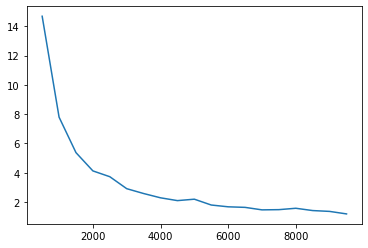

In [168]:
plt.plot(np.arange(500,10000,500),times[38:])

In [15]:
## Hypergraph

def getRandomLevel(p = 0.5):
    lvl = 0
    while rand.random() < p and lvl < float('inf'):
        lvl = lvl + 1
    return lvl + 1

class HyperEdge:
    def __init__(self):
        self.nodes = []
        self.min = float("inf")
        self.max = float("-inf")
        self.height = 0

class HyperGraph:
    def __init__(self):
        self.p = 0.5
        self.height = getRandomLevel(self.p)
        self.hedges = [HyperEdge() for i in range(self.height + 1)]

    def lookup(self, nr):
        for he in self.hedges:
            if he.min <= nr <= he.max:
                L = len(he.nodes)
                i = bisect.bisect_left(he.nodes, nr)
                if i != L and he.nodes[i] == nr:
                    return True
        return False

    def findsert(self, nr, he):
        L = len(he.nodes)
        i = bisect.bisect_left(he.nodes, nr)
        if i != L and he.nodes[i] == nr:
            return False, False
        else:
            return i, he.nodes
    
    def insert(self, nr):

        height = getRandomLevel()

        if self.height < height:

            for i in range(height - self.height):
                self.hedges.append(HyperEdge())

            self.height = height

        test = self.hedges[height - 1]

        i, he = self.findsert(nr, test)

        if i is not False:
            he.insert(i, nr)
            if test.min > nr:
                test.min = nr
            if test.max < nr:
                test.max = nr
        else:
            return False

    def show_hedges(self):
        for i in self.hedges:
            print(i.nodes)

    def show_minmax(self):
        for i in self.hedges:
            print(f'min = {i.min} \nmax = {i.max}')

In [301]:
## Insert timeit

hgraph = HyperGraph()
hgraph.p = 0.5
#btree = Tree()
#skeep = SkipList()
#skeepNaive = SkipListNaive(10, 0.5)
#llist = LinkedList()
#sset = set()
#bset = 0

nr = 100000
random.seed(0)
ten_thousand_integers = [rand.randint(1, 5000000) for i in range(nr)]

def ten_k_hg(HG):
    for i in range(nr):
        HG.insert(ten_thousand_integers[i])

def ten_k_sl(skeep):
    for i in range(nr):
        skeep.insert(ten_thousand_integers[i])

def ten_k_sln(skeepNaive):
    for i in range(nr):
        skeepNaive.insert(ten_thousand_integers[i])
        
def ten_k_liszt(llist):
    for i in range(nr):
        llist.insert(ten_thousand_integers[i])

def ten_k_btree(btree):
    for i in range(nr):
        btree.add(ten_thousand_integers[i])

def ten_k_sset(sset):
    for i in range(nr):
        sset.add(ten_thousand_integers[i])
        
def ten_k_bset(bset):
    for i in range(nr):
        bset |= 1 << i
# So far it's 10 times slower than a skip list
# But 8 times faster than a linked list.
#%timeit -r 1 -n 10 ten_k_sset(sset)
#%timeit -r 1 -n 10 ten_k_bset(bset)
%timeit -r 1 -n 1 ten_k_hg(hgraph)
#hgraph.show_hedges()
#%timeit -r 1 -n 1 ten_k_sl(skeep)
#%timeit -r 1 -n 1 ten_k_sl(skeepNaive)
#%timeit -r 1 -n 1 ten_k_btree(btree)
#%timeit -r 1 -n 10 ten_k_liszt(llist)
#%timeit -r 1 -n 10 sorted(ten_thousand_integers)

1 loop, best of 1: 577 ms per loop


In [43]:
## Skiplist

class SkipNode:
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height
    def get_elem(self):
        return self.elem
    def get_next(self):
        return self.next
    

class SkipList:
    def __init__(self):
        self.head = SkipNode()
    def get_head(self):
        return self.head
    def randomHeight(self):
        height = 1
        while rand.randint(1, 2) != 1:
            height += 1
        return height

    def updateList(self, elem):

        update = [None]*len(self.head.next)
        x = self.head

        for i in reversed(range(len(self.head.next))):
            while x.next[i] != None and \
                x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x

        return update

    def find(self, elem, update = None):
        cnt = 0
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            candidate = update[0].next[0]
            if candidate != None and candidate.elem == elem:
                return candidate
        return None

    def findcnt(self, elem, update = None):
        cnt = 0
        if update == None:
            #update = self.updateList(elem)
            update = [None]*len(self.head.next)
            x = self.head
            for i in reversed(range(len(self.head.next))):
                while x.next[i] != None and x.next[i].elem < elem:
                    cnt = cnt + 1
                    x = x.next[i]
                update[i] = x
            
        cnt = cnt + 1
        if len(update) > 0:
            candidate = update[0].next[0]
            cnt = cnt + 1
            if candidate != None and candidate.elem == elem:
                cnt = cnt + 1
                return cnt
        return cnt
    
    def insert(self, elem):

        node = SkipNode(self.randomHeight(), elem)

        while len(self.head.next) < len(node.next):
            self.head.next.append(None)

        update = self.updateList(elem)
        if self.find(elem, update) == None:
            for i in range(len(node.next)):
                node.next[i] = update[i].next[i]
                update[i].next[i] = node

In [72]:
sl = SkipList()
sl.insert(12)
sl.insert(3)
sl.insert(1)
sl.insert(7)
sl.insert(23)
sl.insert(9)
el = sl.get_head()
l = el.get_next()
for i in l:
    print(i.get_elem())
    for q in i.get_next():
        print(q.get_elem())


1
3
9
9
1
3
9
9
1
3
9
9
9
12


AttributeError: 'NoneType' object has no attribute 'get_elem'

In [258]:
# SkipList Naive
class NodeSKP(object): 
    def __init__(self, key, level): 
        self.key = key 
        self.forward = [None]*(level+1) 
  
class SkipListNaive(object): 
    def __init__(self, max_lvl, P): 
        self.MAXLVL = max_lvl 
        self.P = P 
        self.header = self.createNode(self.MAXLVL, -1) 
        self.level = 0
      
    def createNode(self, lvl, key): 
        n = NodeSKP(key, lvl) 
        return n 

    def randomLevel(self): 
        lvl = 0
        while rand.random()<self.P and lvl<self.MAXLVL:lvl += 1
        return lvl 

    def find(self, key):  
        current = self.header 
        for i in range(self.level, -1, -1): 
            while(current.forward[i] and current.forward[i].key < key): 
                current = current.forward[i] 
        current = current.forward[0] 
        if current and current.key == key: 
            return key  

    def insert(self, key): 
        update = [None]*(self.MAXLVL+1) 
        current = self.header 
        for i in range(self.level, -1, -1): 
            while current.forward[i] and current.forward[i].key < key: 
                current = current.forward[i] 
            update[i] = current 
            
        current = current.forward[0] 
  
        if current == None or current.key != key: 
            rlevel = self.randomLevel() 
  
            if rlevel > self.level: 
                for i in range(self.level+1, rlevel+1): 
                    update[i] = self.header 
                self.level = rlevel 
  
            n = self.createNode(rlevel, key) 
  
            for i in range(rlevel+1): 
                n.forward[i] = update[i].forward[i] 
                update[i].forward[i] = n 

In [5]:
class Node:
    def __init__(self, val):
        self.l = None
        self.r = None
        self.v = val

class Tree:
    def __init__(self):
        self.root = None

    def getRoot(self):
        return self.root

    def add(self, val):
        if self.root is None:
            self.root = Node(val)
        else:
            self._add(val, self.root)

    def _add(self, val, node):
        if val < node.v:
            if node.l is not None:
                self._add(val, node.l)
            else:
                node.l = Node(val)
        else:
            if node.r is not None:
                self._add(val, node.r)
            else:
                node.r = Node(val)

    def find(self, val):
        if self.root is not None:
            return self._find(val, self.root)
        else:
            return None

    def _find(self, val, node):
        if val == node.v:
            return node
        elif (val < node.v and node.l is not None):
            self._find(val, node.l)
        elif (val > node.v and node.r is not None):
            self._find(val, node.r)

    def deleteTree(self):
        # garbage collector will do this for us.
        self.root = None

    def printTree(self):
        if self.root is not None:
            self._printTree(self.root)

    def _printTree(self, node):
        if node is not None:
            self._printTree(node.l)
            print(str(node.v) + ' ')
            self._printTree(node.r)

In [76]:
## Insert timeit

hgraph = HyperGraph()
hgraph.p = 0.5
btree = Tree()
skeep = SkipList()
skeepNaive = SkipListNaive(10, 0.5)
#llist = LinkedList()
#sset = set()
#bset = 0

nr = 10000

ten_thousand_integers = [rand.randint(1, 5000000) for i in range(nr)]

def ten_k_hg(HG):
    for i in range(nr):
        HG.insert(ten_thousand_integers[i])

def ten_k_sl(skeep):
    for i in range(nr):
        skeep.insert(ten_thousand_integers[i])

def ten_k_sln(skeepNaive):
    for i in range(nr):
        skeepNaive.insert(ten_thousand_integers[i])
        
def ten_k_liszt(llist):
    for i in range(nr):
        llist.insert(ten_thousand_integers[i])

def ten_k_btree(btree):
    for i in range(nr):
        btree.add(ten_thousand_integers[i])

def ten_k_sset(sset):
    for i in range(nr):
        sset.add(ten_thousand_integers[i])
        
def ten_k_bset(bset):
    for i in range(nr):
        bset |= 1 << i
# So far it's 10 times slower than a skip list
# But 8 times faster than a linked list.
#%timeit -r 1 -n 10 ten_k_sset(sset)
#%timeit -r 1 -n 10 ten_k_bset(bset)
%timeit -r 1 -n 1 ten_k_hg(hgraph)
%timeit -r 1 -n 1 ten_k_sl(skeep)
%timeit -r 1 -n 1 ten_k_sl(skeepNaive)
%timeit -r 1 -n 1 ten_k_btree(btree)
#%timeit -r 1 -n 10 ten_k_liszt(llist)
#%timeit -r 1 -n 10 sorted(ten_thousand_integers)

66.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
281 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
169 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
108 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
def binarySearch(arr, l, r, x):

    while l <= r:

        mid = l + (r - l) // 2

        # Check if x is present at mid
        if arr[mid] == x:
            return mid

        # If x is greater, ignore left half
        elif arr[mid] < x:
            l = mid + 1

        # If x is smaller, ignore right half
        else:
            r = mid - 1

    # If we reach here, then the element
    # was not present
    return -1

In [77]:
## Find timeit
listhg = []
listskp = []
liszt = sorted(ten_thousand_integers)

def ten_k_hg(HG):
    for i in range(nr):
        HG.lookup(ten_thousand_integers[i])

def ten_k_sl(skeep):
    for i in range(nr):
        skeep.findcnt(ten_thousand_integers[i])        
        
def ten_k_sl_naive(skeepNaive):
    for i in range(nr):
        skeepNaive.find(ten_thousand_integers[i])

def ten_k_liszt(llist):

    for i in range(nr):
        llist.find(ten_thousand_integers[i])

def ten_k_sset(sset):
    for i in range(nr):
        ten_thousand_integers[i] in sset
        
def ten_k_bset(bset):
    for i in range(nr):
        bset & 1 << ten_thousand_integers[i]

def ten_k_btree(btree):
    for i in range(nr):
        btree.find(ten_thousand_integers[i])

def ten_k_binarySearch(llist):
    for i in range(nr):
        binarySearch(llist, 0, len(llist), ten_thousand_integers[i])

#%timeit -r 1 -n 10 ten_k_bset(bset)
#%timeit -r 1 -n 10 ten_k_sset(sset)
%timeit -r 1 -n 1 ten_k_hg(hgraph)
%timeit -r 1 -n 1 ten_k_sl(skeep)
%timeit -r 1 -n 1 ten_k_sl_naive(skeepNaive)
%timeit -r 1 -n 1 ten_k_btree(btree)
%timeit -r 1 -n 1 ten_k_binarySearch(liszt)
#%timeit -r 1 -n 10 ten_k_liszt(llist)
#%timeit -r 1 -n 10 sorted(ten_thousand_integers)

### So apparently the lookup function is slow asf.
### Insert is actually kinda ok.

34.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
186 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
193 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
136 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
72.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
#import pickle
#import sys
#sys.setrecursionlimit(100000)

#pickle.dump(hgraph, open("hgraph.p", "wb" ))
#pickle.dump(skeep, open("skeep.p", "wb"))

In [10]:
hgraph.show_hedges()
hgraph.show_minmax()

hgraph.lookup(303)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



False